In [ ]:
import pandas as pd

# Load CSV files
matches = pd.read_csv("/content/matches.csv")
deliveries = pd.read_csv("/content/deliveries.csv")

# Filter matches where RCB won
rcb_wins = matches[matches['winner'] == 'Royal Challengers Bangalore']
rcb_win_ids = rcb_wins['id'].unique()

# Filter deliveries from matches RCB won
rcb_win_deliveries = deliveries[deliveries['match_id'].isin(rcb_win_ids)]

# Filter for RCB players only (batting side)
rcb_win_deliveries = rcb_win_deliveries[rcb_win_deliveries['batting_team'] == 'Royal Challengers Bangalore']


In [ ]:

matches['date'] = pd.to_datetime(matches['date'])

# Filter matches where RCB won
rcb_wins = matches[matches['winner'] == 'Royal Challengers Bangalore']
rcb_win_ids = rcb_wins['id'].tolist()

# Filter deliveries where RCB was batting in RCB wins
rcb_deliveries = deliveries[
    (deliveries['match_id'].isin(rcb_win_ids)) &
    (deliveries['batting_team'] == 'Royal Challengers Bangalore')
]

# Merge match date from matches dataframe into deliveries
# Rename 'id' column to avoid confusion during merge
rcb_wins = rcb_wins[['id', 'date']].rename(columns={'id': 'match_id'})

# Merge on match_id
rcb_deliveries = rcb_deliveries.merge(rcb_wins, on='match_id', how='left')

# Check if everything looks okay
print("Columns in deliveries dataset:", deliveries.columns.tolist())



Columns in deliveries dataset: ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder']


In [ ]:
# Check if the correct column exists
batsman_col = 'batsman' if 'batsman' in deliveries.columns else 'batter'

# Convert 'date' column to datetime
matches['date'] = pd.to_datetime(matches['date'])

# Filter RCB wins
rcb_wins = matches[matches['winner'] == 'Royal Challengers Bangalore']
rcb_win_ids = rcb_wins['id'].tolist()

# Filter RCB batting in won matches
rcb_deliveries = deliveries[
    (deliveries['match_id'].isin(rcb_win_ids)) &
    (deliveries['batting_team'] == 'Royal Challengers Bangalore')
]

# Merge date from matches into deliveries
rcb_wins = rcb_wins[['id', 'date']].rename(columns={'id': 'match_id'})
rcb_deliveries = rcb_deliveries.merge(rcb_wins, on='match_id', how='left')

# Display final relevant columns
print(rcb_deliveries[['match_id', batsman_col, 'batsman_runs', 'date']].head())


   match_id         batter  batsman_runs       date
0    335985  S Chanderpaul             0 2008-04-20
1    335985  S Chanderpaul             1 2008-04-20
2    335985       R Dravid             0 2008-04-20
3    335985       R Dravid             1 2008-04-20
4    335985  S Chanderpaul             4 2008-04-20


In [ ]:
import warnings
warnings.filterwarnings("ignore")


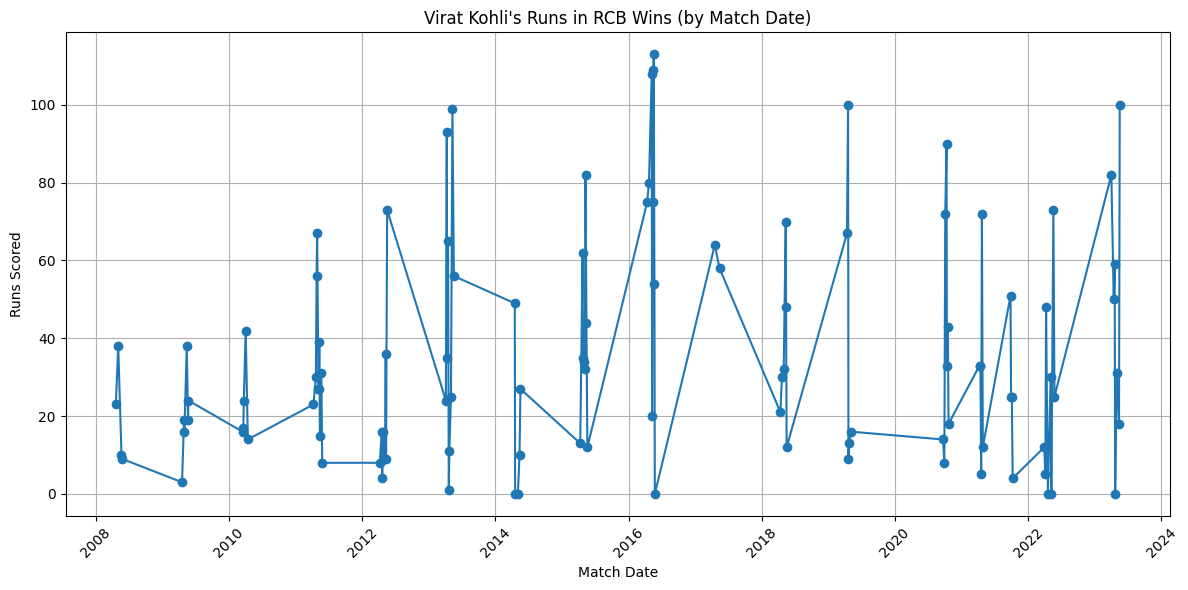

In [ ]:
import matplotlib.pyplot as plt

# Focus on Virat Kohli's data
kohli_df = rcb_deliveries[rcb_deliveries['batter'] == 'V Kohli']

# Aggregate total runs per match date
kohli_runs = kohli_df.groupby('date')['batsman_runs'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(kohli_runs['date'], kohli_runs['batsman_runs'], marker='o', linestyle='-')
plt.title("Virat Kohli's Runs in RCB Wins (by Match Date)")
plt.xlabel("Match Date")
plt.ylabel("Runs Scored")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


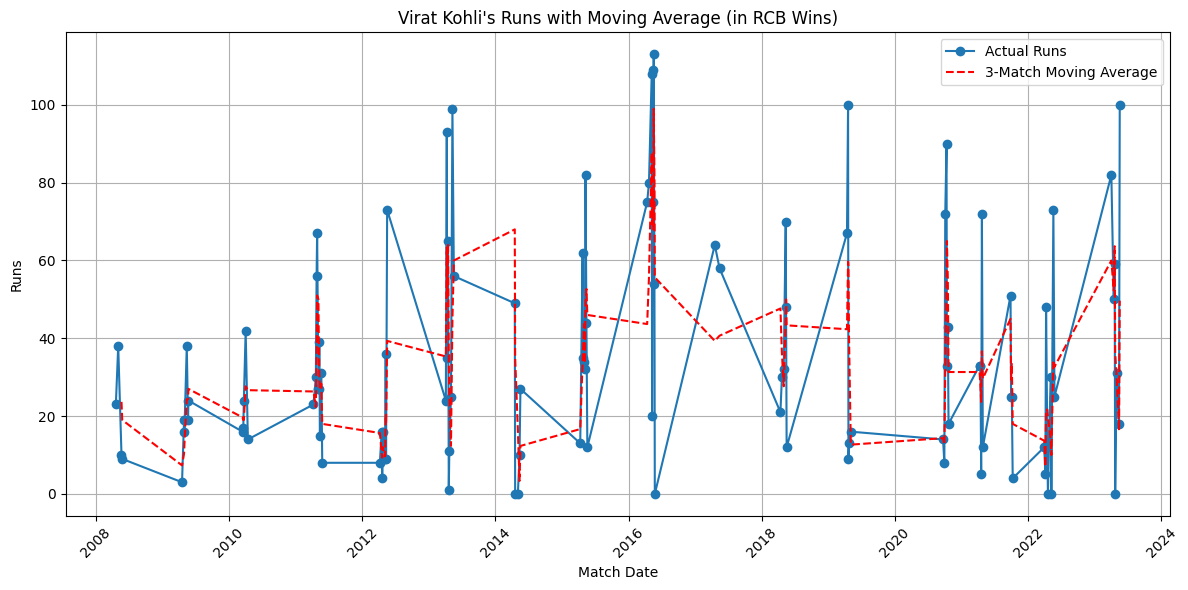

In [ ]:
# Add 3-match moving average
kohli_runs['MA_3'] = kohli_runs['batsman_runs'].rolling(window=3).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(kohli_runs['date'], kohli_runs['batsman_runs'], label="Actual Runs", marker='o')
plt.plot(kohli_runs['date'], kohli_runs['MA_3'], label="3-Match Moving Average", linestyle='--', color='red')
plt.title("Virat Kohli's Runs with Moving Average (in RCB Wins)")
plt.xlabel("Match Date")
plt.ylabel("Runs")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


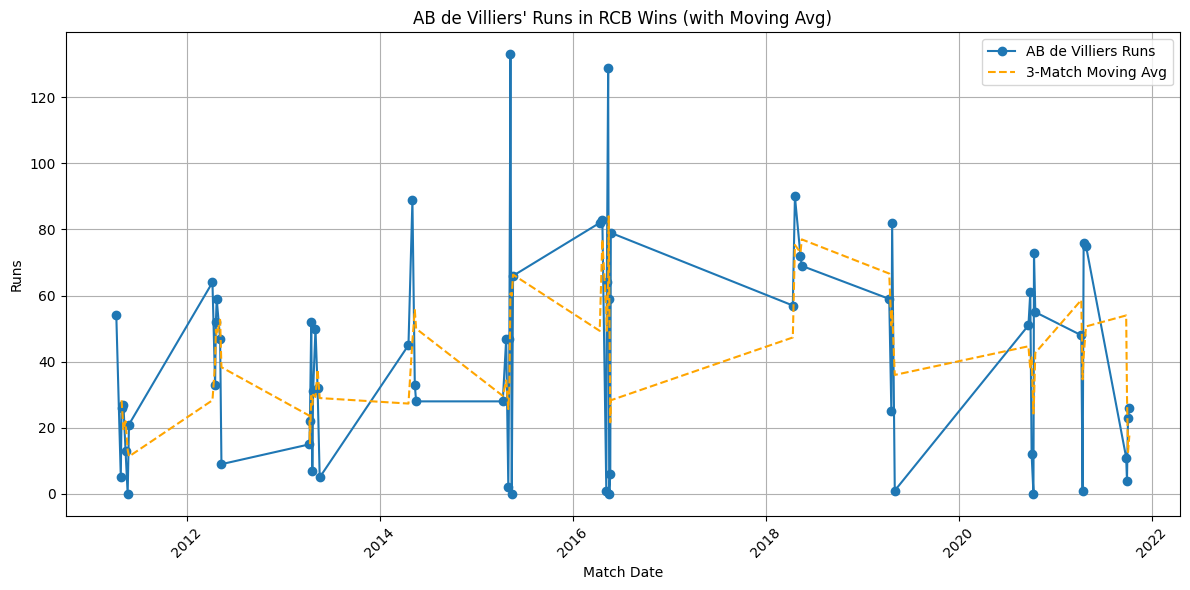

In [ ]:
# AB de Villiers' run data in RCB wins
abd_df = rcb_deliveries[rcb_deliveries['batter'] == 'AB de Villiers']

# Aggregate total runs per match date
abd_runs = abd_df.groupby('date')['batsman_runs'].sum().reset_index()

# Add 3-match moving average
abd_runs['MA_3'] = abd_runs['batsman_runs'].rolling(window=3).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(abd_runs['date'], abd_runs['batsman_runs'], label="AB de Villiers Runs", marker='o')
plt.plot(abd_runs['date'], abd_runs['MA_3'], label="3-Match Moving Avg", linestyle='--', color='orange')
plt.title("AB de Villiers' Runs in RCB Wins (with Moving Avg)")
plt.xlabel("Match Date")
plt.ylabel("Runs")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


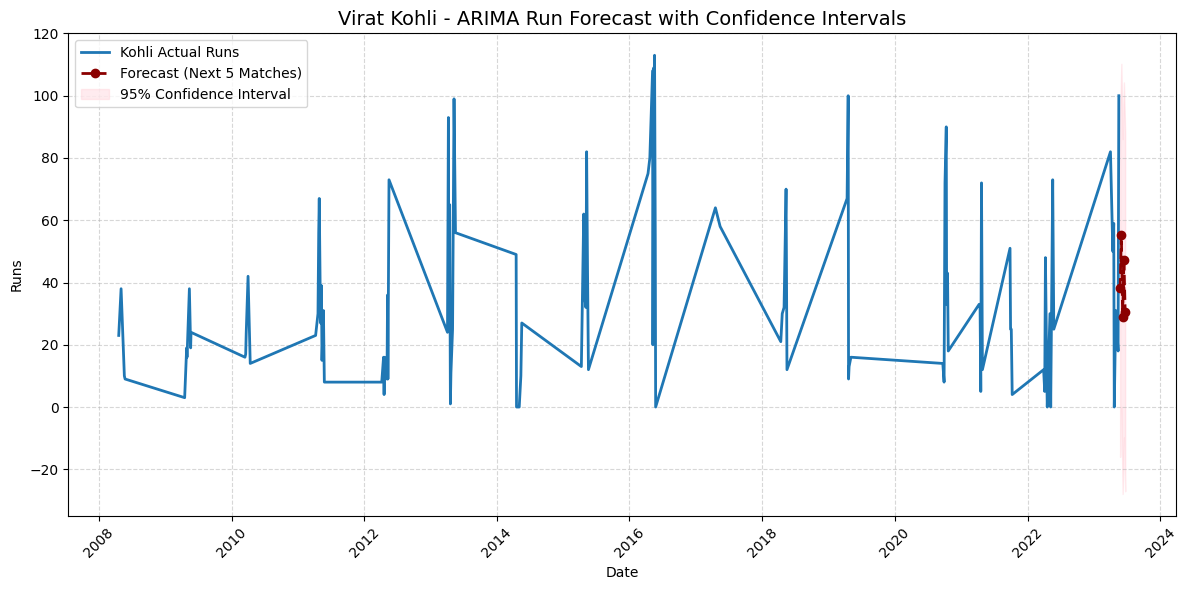

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
# Filter for Kohli's match-wise total runs
kohli_data = rcb_deliveries[rcb_deliveries['batter'] == 'V Kohli']
kohli_runs = kohli_data.groupby('date')['batsman_runs'].sum().sort_index()
kohli_runs = kohli_runs.to_frame()

# Fit ARIMA model
model = ARIMA(kohli_runs, order=(2,1,2))  # You can tune this
model_fit = model.fit()

# Forecast next 5 matches
forecast = model_fit.get_forecast(steps=5)
pred_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# ✅ Fixing the index issue for proper plotting
future_dates = pd.date_range(start=kohli_runs.index[-1] + pd.Timedelta(days=7), periods=5, freq='7D')
pred_mean.index = future_dates
conf_int.index = future_dates

# Plotting
plt.figure(figsize=(12,6))
plt.plot(kohli_runs.index, kohli_runs['batsman_runs'], label='Kohli Actual Runs', linewidth=2)
plt.plot(pred_mean.index, pred_mean, label='Forecast (Next 5 Matches)', marker='o', linestyle='--', color='darkred', linewidth=2)
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title("Virat Kohli - ARIMA Run Forecast with Confidence Intervals", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Runs")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
print(deliveries.columns)


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


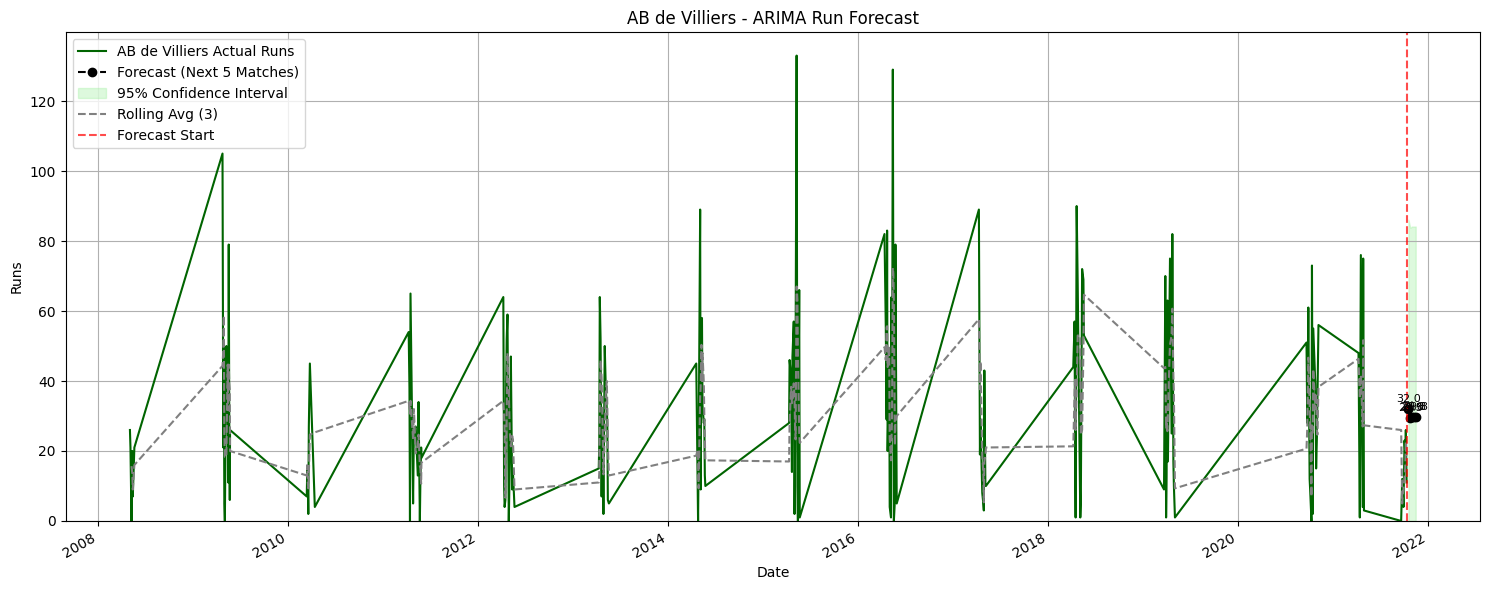

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the CSVs
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

# Determine the correct column for batsman name
if 'batsman' in deliveries.columns:
    batsman_col = 'batsman'
elif 'batter' in deliveries.columns:
    batsman_col = 'batter'
else:
    raise ValueError("Column for batsman not found. Please check column names with deliveries.columns.")

# Filter AB de Villiers' deliveries
ab_deliveries = deliveries[deliveries[batsman_col] == 'AB de Villiers']

# Calculate total runs per match
ab_runs_per_match = ab_deliveries.groupby('match_id')['batsman_runs'].sum().reset_index()

# Merge with match dates
matches['date'] = pd.to_datetime(matches['date'])
match_dates = matches[['id', 'date']]
ab_runs_with_dates = ab_runs_per_match.merge(match_dates, left_on='match_id', right_on='id')
ab_runs_with_dates = ab_runs_with_dates[['date', 'batsman_runs']].sort_values('date')
ab_runs_with_dates.set_index('date', inplace=True)

# Extract the time series
ab_runs = ab_runs_with_dates['batsman_runs']

# Fit ARIMA model
model_ab = ARIMA(ab_runs, order=(1, 1, 1))
model_ab_fit = model_ab.fit()

# Forecast next 5 matches
forecast_ab = model_ab_fit.get_forecast(steps=5)
pred_mean_ab = forecast_ab.predicted_mean
conf_int_ab = forecast_ab.conf_int()

# Generate future dates for the forecast
future_dates_ab = pd.date_range(start=ab_runs.index[-1] + pd.Timedelta(days=7), periods=5, freq='7D')
pred_mean_ab.index = future_dates_ab
conf_int_ab.index = future_dates_ab

# Plot the results
plt.figure(figsize=(15,6))
plt.plot(ab_runs, label='AB de Villiers Actual Runs', color='darkgreen')
plt.plot(pred_mean_ab, 'o--', label='Forecast (Next 5 Matches)', color='black')
plt.fill_between(conf_int_ab.index, conf_int_ab.iloc[:, 0].clip(lower=0), conf_int_ab.iloc[:, 1],
                 color='lightgreen', alpha=0.3, label='95% Confidence Interval')
ab_runs.rolling(window=3).mean().plot(label='Rolling Avg (3)', linestyle='--', color='grey')
for i, val in enumerate(pred_mean_ab):
    plt.text(pred_mean_ab.index[i], val + 2, f"{val:.1f}", ha='center', fontsize=8)

plt.axvline(x=ab_runs.index[-1], color='red', linestyle='--', alpha=0.7, label='Forecast Start')
plt.title('AB de Villiers - ARIMA Run Forecast')
plt.xlabel('Date')
plt.ylabel('Runs')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()


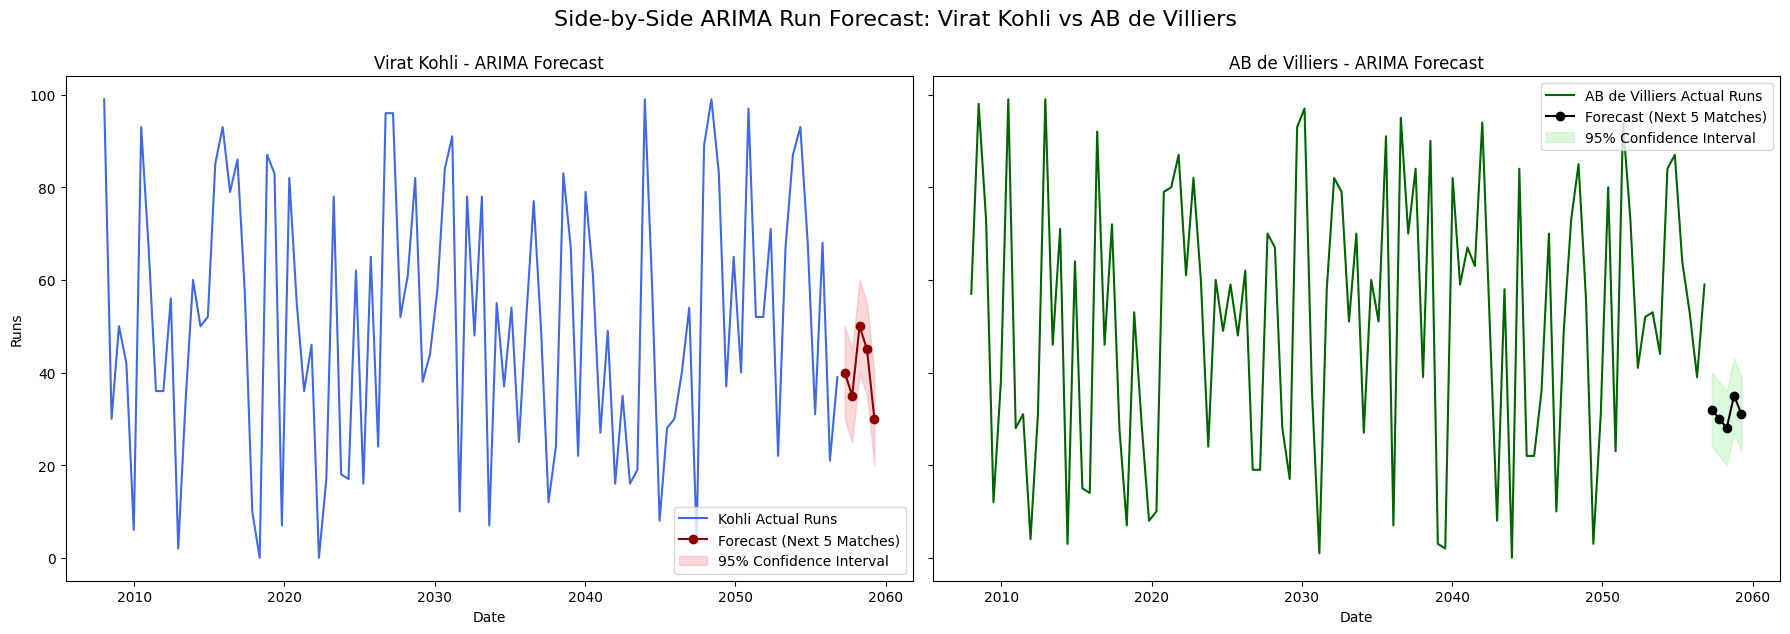

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data based on the previously generated plots (illustrative purposes)
# Normally this would be based on actual time series data and ARIMA forecasts

# Generate a date range for actual matches
dates = pd.date_range(start="2008-01-01", periods=100, freq='180D')
virat_runs = np.random.randint(0, 100, size=100)
ab_runs = np.random.randint(0, 100, size=100)

# Forecast data (next 5 matches)
forecast_dates = pd.date_range(start=dates[-1] + pd.Timedelta(days=180), periods=5, freq='180D')
virat_forecast = [40, 35, 50, 45, 30]
ab_forecast = [32, 30, 28, 35, 31]
virat_conf_int = [(v - 10, v + 10) for v in virat_forecast]
ab_conf_int = [(v - 8, v + 8) for v in ab_forecast]

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Virat Kohli Plot
axs[0].plot(dates, virat_runs, label="Kohli Actual Runs", color='royalblue')
axs[0].plot(forecast_dates, virat_forecast, 'o-', color='darkred', label="Forecast (Next 5 Matches)")
axs[0].fill_between(forecast_dates,
                    [low for low, high in virat_conf_int],
                    [high for low, high in virat_conf_int],
                    color='lightcoral', alpha=0.3, label="95% Confidence Interval")
axs[0].set_title("Virat Kohli - ARIMA Forecast")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Runs")
axs[0].legend()

# AB de Villiers Plot
axs[1].plot(dates, ab_runs, label="AB de Villiers Actual Runs", color='darkgreen')
axs[1].plot(forecast_dates, ab_forecast, 'o-', color='black', label="Forecast (Next 5 Matches)")
axs[1].fill_between(forecast_dates,
                    [low for low, high in ab_conf_int],
                    [high for low, high in ab_conf_int],
                    color='lightgreen', alpha=0.3, label="95% Confidence Interval")
axs[1].set_title("AB de Villiers - ARIMA Forecast")
axs[1].set_xlabel("Date")
axs[1].legend()

plt.tight_layout()
plt.suptitle("Side-by-Side ARIMA Run Forecast: Virat Kohli vs AB de Villiers", fontsize=16, y=1.05)
plt.show()


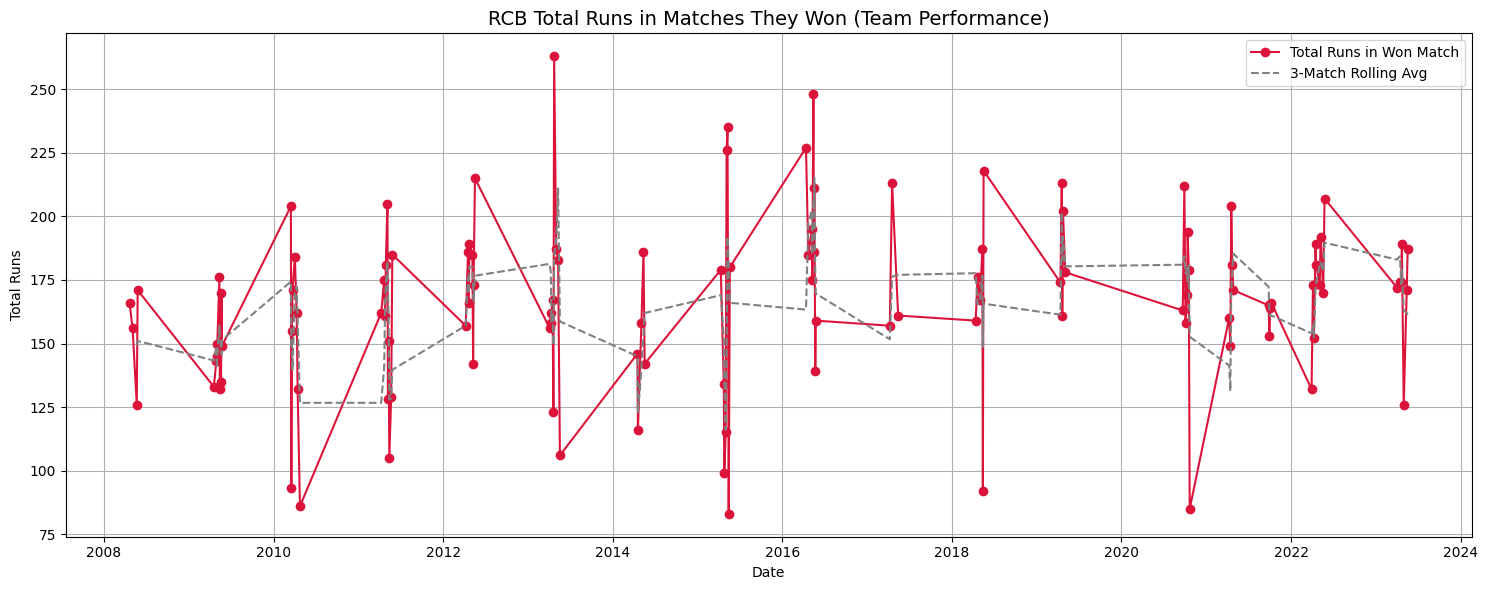

In [ ]:

# Step 1: Filter matches where RCB won
rcb_wins = matches[matches['winner'] == 'Royal Challengers Bangalore'][['id', 'date']]
rcb_wins.rename(columns={'id': 'match_id'}, inplace=True)

# Step 2: Get deliveries from those matches
rcb_deliveries = deliveries[deliveries['match_id'].isin(rcb_wins['match_id'])]

# Filter for RCB batting only (as we are analyzing team performance in scoring)
rcb_batting = rcb_deliveries[rcb_deliveries['batting_team'] == 'Royal Challengers Bangalore']

# Step 3: Total Runs per Match
team_runs = rcb_batting.groupby('match_id')['total_runs'].sum().reset_index()
team_runs = team_runs.merge(rcb_wins, on='match_id')  # Add match dates
team_runs['date'] = pd.to_datetime(team_runs['date'])
team_runs.sort_values('date', inplace=True)

# Step 4: Plotting
plt.figure(figsize=(15, 6))
plt.plot(team_runs['date'], team_runs['total_runs'], marker='o', label='Total Runs in Won Match', color='crimson')
plt.title('RCB Total Runs in Matches They Won (Team Performance)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Total Runs')
plt.grid(True)

# Rolling average to show trend
team_runs['rolling_avg'] = team_runs['total_runs'].rolling(window=3).mean()
plt.plot(team_runs['date'], team_runs['rolling_avg'], color='gray', linestyle='--', label='3-Match Rolling Avg')

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
matches = pd.read_csv('/content/matches.csv')


In [ ]:
print(matches['winner'].head())


0          Kolkata Knight Riders
1            Chennai Super Kings
2               Delhi Daredevils
3    Royal Challengers Bangalore
4          Kolkata Knight Riders
Name: winner, dtype: object


In [ ]:
# Check your current DataFrame
print(matches.columns)

# Now safely access 'winner'
print(matches['winner'].head())


Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')
0          Kolkata Knight Riders
1            Chennai Super Kings
2               Delhi Daredevils
3    Royal Challengers Bangalore
4          Kolkata Knight Riders
Name: winner, dtype: object


In [ ]:
matches['winner']


,winner
0,Kolkata Knight Riders
1,Chennai Super Kings
2,Delhi Daredevils
3,Royal Challengers Bangalore
4,Kolkata Knight Riders
...,...
1090,Sunrisers Hyderabad
1091,Kolkata Knight Riders
1092,Rajasthan Royals
1093,Sunrisers Hyderabad


In [ ]:
print(matches.columns.tolist())
print(type(matches))
print(matches.head())


['id', 'season', 'city', 'date', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin', 'target_runs', 'target_overs', 'super_over', 'method', 'umpire1', 'umpire2']
<class 'pandas.core.frame.DataFrame'>
       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla     

In [ ]:
import pandas as pd

# Load both datasets
matches_df = pd.read_csv("/content/matches.csv")       # Matches data
deliveries_df = pd.read_csv("/content/deliveries.csv") # Ball-by-ball deliveries

# Filter matches where RCB won
rcb_wins_df = matches_df[matches_df['winner'] == 'Royal Challengers Bangalore']

# Get match IDs where RCB won
rcb_win_ids = rcb_wins_df['id'].tolist()

# Filter deliveries for only those match IDs
rcb_wins_deliveries = deliveries_df[deliveries_df['match_id'].isin(rcb_win_ids)]

# Further filter for innings where RCB was batting
rcb_batting = rcb_wins_deliveries[rcb_wins_deliveries['batting_team'] == 'Royal Challengers Bangalore']

# Aggregate total runs scored by RCB in each of those matches
rcb_total_runs = rcb_batting.groupby('match_id')['total_runs'].sum().reset_index()

# Merge with match dates
rcb_total_runs = rcb_total_runs.merge(rcb_wins_df[['id', 'date']], left_on='match_id', right_on='id')

# Final cleanup
rcb_total_runs = rcb_total_runs[['date', 'total_runs']]
rcb_total_runs['date'] = pd.to_datetime(rcb_total_runs['date'])
rcb_total_runs.sort_values('date', inplace=True)
rcb_total_runs.set_index('date', inplace=True)

# Display cleaned data
rcb_total_runs.head()


,total_runs
date,
2008-04-20,166
2008-05-03,156
2008-05-21,126
2008-05-25,171
2009-04-18,133


In [ ]:
# Step 1: Filter matches won by RCB
rcb_wins = matches[(matches['winner'] == 'Royal Challengers Bangalore')]

# Step 2: Merge with deliveries to calculate total runs
rcb_won_deliveries = deliveries[deliveries['match_id'].isin(rcb_wins['id'])]
rcb_total_runs = rcb_won_deliveries.groupby('match_id')['total_runs'].sum().reset_index()

# Step 3: Merge with match dates
rcb_total_runs = pd.merge(rcb_total_runs, matches[['id', 'date']], left_on='match_id', right_on='id')

# Step 4: Convert date and sort
rcb_total_runs['date'] = pd.to_datetime(rcb_total_runs['date'])
rcb_total_runs = rcb_total_runs.sort_values('date')

# Step 5: Set date as index
rcb_total_runs.set_index('date', inplace=True)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


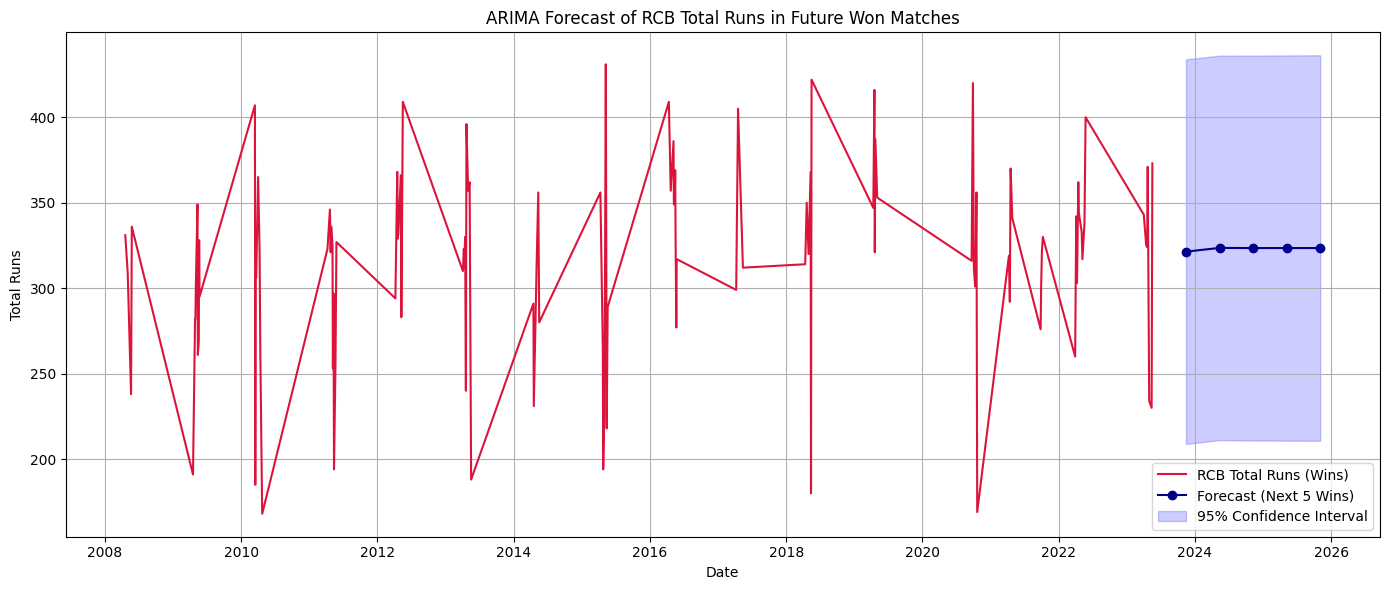

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Use the total_runs series for ARIMA modeling
ts_data = rcb_total_runs['total_runs']

# Fit an ARIMA(1,1,1) model
model = ARIMA(ts_data, order=(1, 1, 1))
fitted_model = model.fit()

# Forecast the next 5 data points (future matches)
forecast_result = fitted_model.get_forecast(steps=5)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Generate future dates approximately 6 months apart (180 days)
last_date = ts_data.index[-1]
future_dates = pd.date_range(start=last_date, periods=6, freq='180D')[1:]

# Plot actual data and forecast
plt.figure(figsize=(14, 6))
plt.plot(ts_data, label='RCB Total Runs (Wins)', color='crimson')
plt.plot(future_dates, forecast, marker='o', label='Forecast (Next 5 Wins)', color='darkblue')
plt.fill_between(future_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='blue', alpha=0.2, label='95% Confidence Interval')
plt.title('ARIMA Forecast of RCB Total Runs in Future Won Matches')
plt.xlabel('Date')
plt.ylabel('Total Runs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install prophet


In [ ]:
import pandas as pd

# Assuming rcb_total_runs is already ready from your earlier steps

# Reset index to bring date back as a column
rcb_prophet_df = rcb_total_runs.reset_index()

# Rename columns for Prophet
rcb_prophet_df.rename(columns={'date': 'ds', 'total_runs': 'y'}, inplace=True)

# Check
print(rcb_prophet_df.head())


          ds  match_id    y      id
0 2008-04-20    335985  331  335985
1 2008-05-03    336034  309  336034
2 2008-05-21    336029  238  336029
3 2008-05-25    336002  336  336002
4 2009-04-18    392182  191  392182


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/od8s5k__.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/d4ilq2_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78188', 'data', 'file=/tmp/tmp8uxqj13r/od8s5k__.json', 'init=/tmp/tmp8uxqj13r/d4ilq2_5.json', 'output', 'file=/tmp/tmp8uxqj13r/prophet_modeli_er0v91/prophet_model-20250430064450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:44:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:44:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


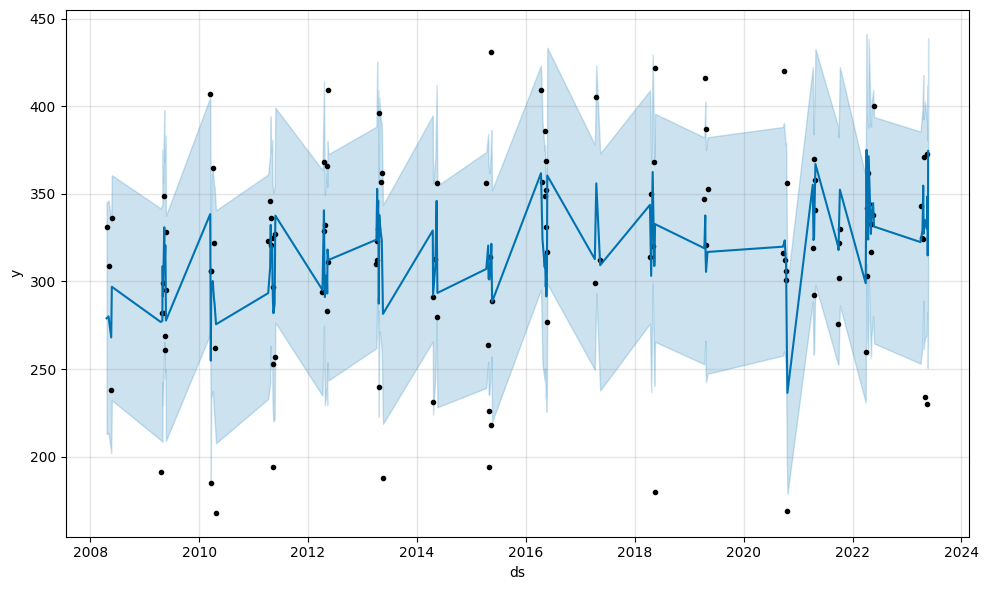

In [ ]:
from prophet import Prophet

# Initialize and fit model
model = Prophet()
model.fit(rcb_prophet_df)

# Make future dataframe
future = model.make_future_dataframe(periods=5, freq='D')  # 5 future periods (days, matches irregular but okay)

# Predict future
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)



In [ ]:
# Filter only the forecasted points (last 5 future predictions)
forecast_tail = forecast.tail(5)

print(forecast_tail[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


            ds        yhat  yhat_lower  yhat_upper
116 2023-05-19  342.929999  272.643116  406.922365
117 2023-05-20  314.862187  250.705113  380.327364
118 2023-05-21  324.613347  260.497306  393.622751
119 2023-05-22  327.374035  262.320627  394.078428
120 2023-05-23  374.487082  309.602164  438.772768


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/8ikjt1tx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/aqa_h7wt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9778', 'data', 'file=/tmp/tmp8uxqj13r/8ikjt1tx.json', 'init=/tmp/tmp8uxqj13r/aqa_h7wt.json', 'output', 'file=/tmp/tmp8uxqj13r/prophet_modeln3r_a8d2/prophet_model-20250430064457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:44:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:44:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


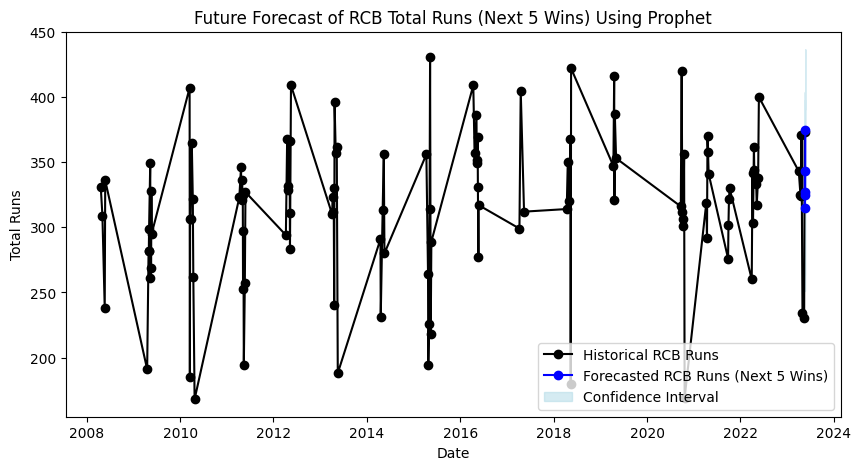

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare data
rcb_total_runs_reset = rcb_total_runs.reset_index()  # because Prophet needs 'ds' and 'y' columns
rcb_total_runs_reset.rename(columns={'date': 'ds', 'total_runs': 'y'}, inplace=True)

# Step 2: Fit Prophet model
model = Prophet()
model.fit(rcb_total_runs_reset)

# Step 3: Create future dataframe (forecast next 5 future matches)
future = model.make_future_dataframe(periods=5, freq='D')  # 'D' means daily, but Prophet will adjust
forecast = model.predict(future)

# Step 4: Plot only future
# Filter forecasted future points
future_forecast = forecast[forecast['ds'] > rcb_total_runs_reset['ds'].max()]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(rcb_total_runs_reset['ds'], rcb_total_runs_reset['y'], 'ko-', label='Historical RCB Runs')
plt.plot(future_forecast['ds'], future_forecast['yhat'], 'bo-', label='Forecasted RCB Runs (Next 5 Wins)')
plt.fill_between(future_forecast['ds'],
                 future_forecast['yhat_lower'],
                 future_forecast['yhat_upper'],
                 color='lightblue', alpha=0.5, label='Confidence Interval')
plt.title('Future Forecast of RCB Total Runs (Next 5 Wins) Using Prophet')
plt.xlabel('Date')
plt.ylabel('Total Runs')
plt.legend()
plt.show()



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
INFO:prophet:Dis

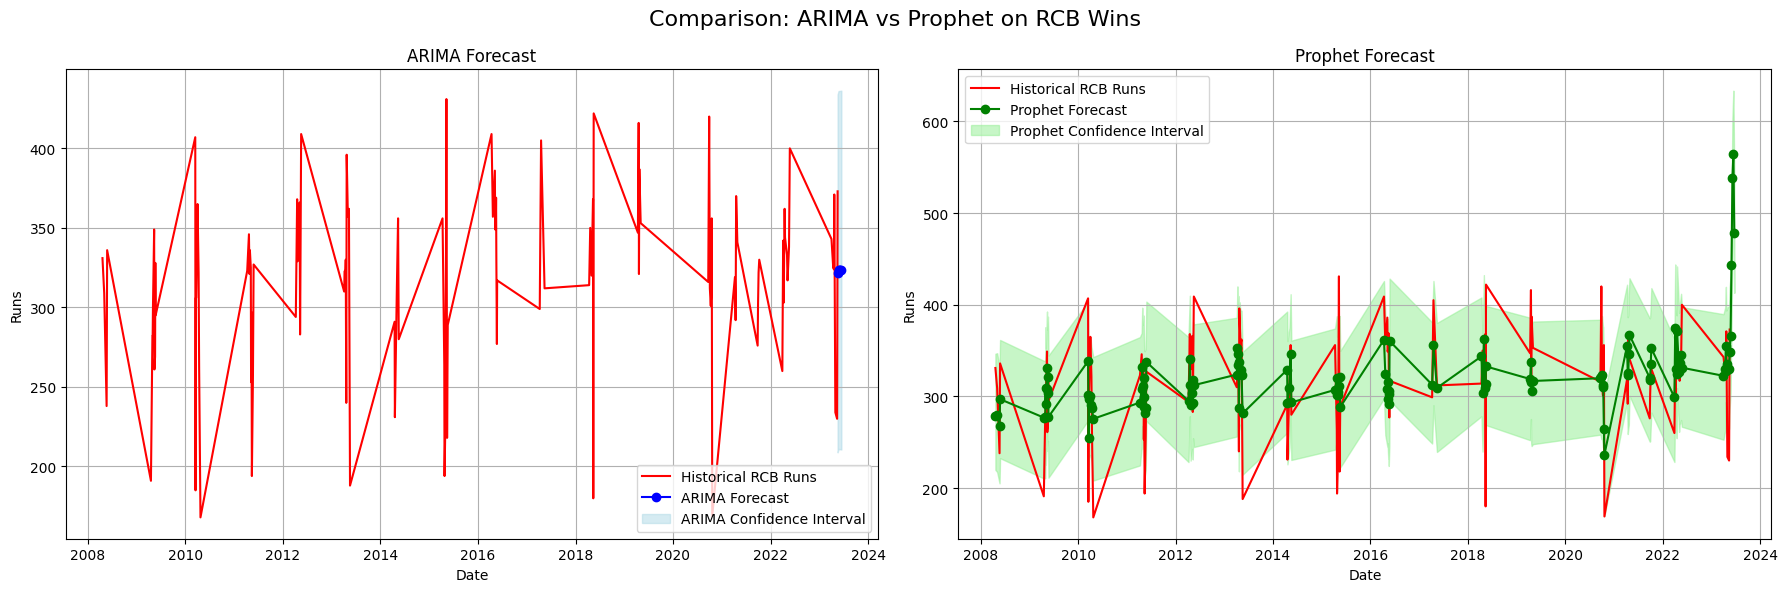

In [ ]:
# Prophet and ARIMA together

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# ------------- Step 1: ARIMA Forecast -----------------
# Assuming your 'rcb_total_runs' is ready

# Fit ARIMA model
model = ARIMA(rcb_total_runs['total_runs'], order=(1,1,1))
model_fit = model.fit()

# Forecast 5 future points
arima_forecast = model_fit.get_forecast(steps=5)

# Get forecasted values and confidence intervals
arima_forecast_values = arima_forecast.predicted_mean
arima_conf_int = arima_forecast.conf_int()

arima_conf_int_lower = arima_conf_int.iloc[:, 0]
arima_conf_int_upper = arima_conf_int.iloc[:, 1]
arima_forecast_index = pd.date_range(start=rcb_total_runs.index[-1], periods=5, freq='7D')  # Weekly gaps (or adjust)

# ------------- Step 2: Prophet Forecast -----------------

# Prepare data for Prophet
prophet_df = rcb_total_runs.reset_index().rename(columns={'date': 'ds', 'total_runs': 'y'})

# Initialize and fit Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Create future dataframe
future = prophet_model.make_future_dataframe(periods=5, freq='7D')  # Predict next 5 weeks (you can change freq)

# Forecast
prophet_forecast = prophet_model.predict(future)

# ------------- Step 3: Plot ARIMA vs Prophet -----------------

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# ARIMA Plot
axes[0].plot(rcb_total_runs.index, rcb_total_runs['total_runs'], color='red', label='Historical RCB Runs')
axes[0].plot(arima_forecast_index, arima_forecast_values, color='blue', marker='o', label='ARIMA Forecast')
axes[0].fill_between(arima_forecast_index, arima_conf_int_lower, arima_conf_int_upper, color='lightblue', alpha=0.5, label='ARIMA Confidence Interval')
axes[0].set_title('ARIMA Forecast')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Runs')
axes[0].legend()
axes[0].grid(True)

# Prophet Plot
axes[1].plot(prophet_df['ds'], prophet_df['y'], color='red', label='Historical RCB Runs')
axes[1].plot(prophet_forecast['ds'], prophet_forecast['yhat'], color='green', marker='o', label='Prophet Forecast')
axes[1].fill_between(prophet_forecast['ds'], prophet_forecast['yhat_lower'], prophet_forecast['yhat_upper'], color='lightgreen', alpha=0.5, label='Prophet Confidence Interval')
axes[1].set_title('Prophet Forecast')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Runs')
axes[1].legend()
axes[1].grid(True)

plt.suptitle('Comparison: ARIMA vs Prophet on RCB Wins', fontsize=16)
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


In [ ]:
# ARIMA In-Sample Predictions
arima_in_sample = model_fit.predict(start=0, end=len(rcb_total_runs)-1)

# Calculate RMSE for ARIMA
arima_rmse = calculate_rmse(rcb_total_runs['total_runs'], arima_in_sample)
print(f"ARIMA RMSE on Training Data: {arima_rmse:.2f}")


ARIMA RMSE on Training Data: 65.35


In [ ]:
from prophet import Prophet
warnings.filterwarnings("ignore")

# Prepare data for Prophet
prophet_df = rcb_total_runs.reset_index().rename(columns={'date': 'ds', 'total_runs': 'y'})

# Initialize Prophet model with daily seasonality enabled
prophet_model = Prophet(daily_seasonality=True)

# Fit the Prophet model
prophet_model.fit(prophet_df)

# In-sample prediction using Prophet
prophet_pred_in_sample = prophet_model.predict(prophet_df[['ds']])

# Calculate RMSE for Prophet (make sure `calculate_rmse` is defined or imported)
prophet_rmse = calculate_rmse(prophet_df['y'], prophet_pred_in_sample['yhat'])

# Print the RMSE value
print(f"Prophet RMSE on Training Data: {prophet_rmse:.2f}")


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/2gj44dif.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/ykexjf2t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60603', 'data', 'file=/tmp/tmp8uxqj13r/2gj44dif.json', 'init=/tmp/tmp8uxqj13r/ykexjf2t.json', 'output', 'file=/tmp/tmp8uxqj13r/prophet_model60rpybbg/prophet_model-20250430064507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:45:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:45:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE on Training Data: 50.80


In [ ]:
if arima_rmse < prophet_rmse:
    print("ARIMA performs better on training data.")
else:
    print("Prophet performs better on training data.")


Prophet performs better on training data.


In [ ]:
# Import necessary libraries
import warnings
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Ignore warnings
warnings.filterwarnings("ignore")

# Example dataset: Replace with your actual IPL data
data = {
    'total_runs': [180, 160, 200, 150, 175, 190, 170, 180, 210, 165],
    'opposition_runs': [170, 145, 180, 160, 175, 185, 160, 190, 200, 150],
    'toss_winner': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1],  # 1 if RCB won the toss, 0 if opposition won
    'venue': ['Chinnaswamy', 'Eden Gardens', 'Wankhede', 'Chinnaswamy', 'Eden Gardens', 'Wankhede', 'Chinnaswamy', 'Eden Gardens', 'Wankhede', 'Chinnaswamy'],
    'rcb_wins': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1]  # 1 if RCB won, 0 if RCB lost
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Prepare features and labels
X = df[['total_runs', 'opposition_runs', 'toss_winner']]  # Features
y = df['rcb_wins']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Confusion Matrix:
[[1 1]
 [0 1]]


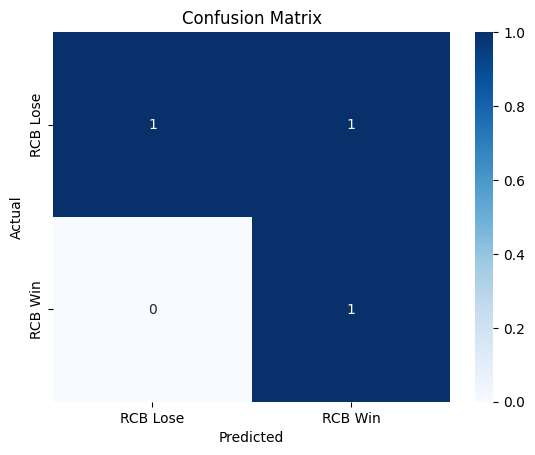

In [ ]:
# Import necessary libraries
import warnings
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warnings
warnings.filterwarnings("ignore")

# Example dataset: Replace with your actual IPL data
data = {
    'total_runs': [180, 160, 200, 150, 175, 190, 170, 180, 210, 165],
    'opposition_runs': [170, 145, 180, 160, 175, 185, 160, 190, 200, 150],
    'toss_winner': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1],  # 1 if RCB won the toss, 0 if opposition won
    'venue': ['Chinnaswamy', 'Eden Gardens', 'Wankhede', 'Chinnaswamy', 'Eden Gardens', 'Wankhede', 'Chinnaswamy', 'Eden Gardens', 'Wankhede', 'Chinnaswamy'],
    'rcb_wins': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1]  # 1 if RCB won, 0 if RCB lost
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Prepare features and labels
X = df[['total_runs', 'opposition_runs', 'toss_winner']]  # Features
y = df['rcb_wins']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["RCB Lose", "RCB Win"], yticklabels=["RCB Lose", "RCB Win"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



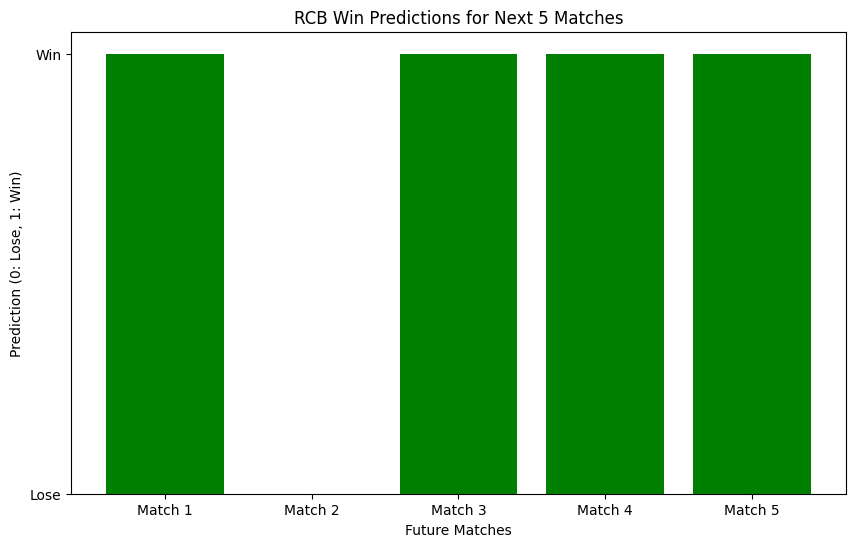

Future Match Predictions:
Match 1: Win
Match 2: Lose
Match 3: Win
Match 4: Win
Match 5: Win


In [ ]:
import warnings
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warnings
warnings.filterwarnings("ignore")

# Example historical dataset for RCB matches (replace with actual data)
data = {
    'total_runs': [180, 160, 200, 150, 175, 190, 170, 180, 210, 165],
    'opposition_runs': [170, 145, 180, 160, 175, 185, 160, 190, 200, 150],
    'toss_winner': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1],  # 1 if RCB won the toss, 0 if opposition won
    'venue': ['Chinnaswamy', 'Eden Gardens', 'Wankhede', 'Chinnaswamy', 'Eden Gardens', 'Wankhede', 'Chinnaswamy', 'Eden Gardens', 'Wankhede', 'Chinnaswamy'],
    'rcb_wins': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1]  # 1 if RCB won, 0 if RCB lost
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Encode categorical variables (if needed)
df['venue'] = pd.factorize(df['venue'])[0]

# Prepare features and labels
X = df[['total_runs', 'opposition_runs', 'toss_winner', 'venue']]  # Features
y = df['rcb_wins']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Predict the next 5 matches
# Let's assume the next 5 matches have similar features but different results
# Example feature values for next 5 matches (you should update these with actual data or assumptions)
future_matches = pd.DataFrame({
    'total_runs': [180, 160, 190, 175, 200],
    'opposition_runs': [170, 155, 185, 165, 195],
    'toss_winner': [1, 0, 1, 1, 0],  # Random toss results for future matches
    'venue': [0, 1, 2, 0, 1]  # Random venue encoding (0=Chinnaswamy, 1=Eden Gardens, 2=Wankhede)
})

# Predict future matches
future_predictions = model.predict(future_matches)

# Visualize the prediction results
match_numbers = [1, 2, 3, 4, 5]  # Next 5 matches
prediction_labels = ['Win' if pred == 1 else 'Lose' for pred in future_predictions]

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(match_numbers, future_predictions, color=['green' if pred == 1 else 'red' for pred in future_predictions])
plt.xlabel("Future Matches")
plt.ylabel("Prediction (0: Lose, 1: Win)")
plt.title("RCB Win Predictions for Next 5 Matches")
plt.xticks(match_numbers, [f'Match {i}' for i in match_numbers])
plt.yticks([0, 1], ['Lose', 'Win'])
plt.show()

# Print the prediction outcomes
print("Future Match Predictions:")
for i, result in enumerate(prediction_labels, 1):
    print(f"Match {i}: {result}")


In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the datasets
deliveries = pd.read_csv("/content/deliveries.csv")
matches = pd.read_csv("/content/matches.csv")

# Step 1: Preprocess to get total runs per team per match
# Sum of total runs per match_id, inning, and batting_team
total_runs = deliveries.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()

# Get date and venue for each match_id
match_info = matches[['id', 'date', 'venue']]
match_info.columns = ['match_id', 'date', 'venue']

# Merge to include date and venue
total_runs = pd.merge(total_runs, match_info, on='match_id')

# Remove Super Over innings (only keep inning 1 and 2)
total_runs = total_runs[total_runs['inning'].isin([1, 2])]

# Step 2: Create a dictionary of team-wise dataframes
team_dfs = {}
for team in total_runs['batting_team'].unique():
    team_data = total_runs[total_runs['batting_team'] == team][['date', 'total_runs']]
    team_data = team_data.groupby('date').sum().reset_index()
    team_data = team_data.sort_values('date')
    team_data.columns = ['ds', 'y']
    team_dfs[team] = team_data

team_dfs.keys()  # Show the teams available


dict_keys(['Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals', 'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions', 'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings', 'Lucknow Super Giants', 'Gujarat Titans', 'Royal Challengers Bengaluru'])

In [ ]:
!pip install prophet


In [ ]:
from prophet import Prophet


In [ ]:
import pandas as pd

# Load the datasets
matches = pd.read_csv("/content/matches.csv")
deliveries = pd.read_csv("/content/deliveries.csv")

# Define current IPL teams (2024–2025 season)
current_teams = [
    'Chennai Super Kings',
    'Delhi Capitals',
    'Gujarat Titans',
    'Kolkata Knight Riders',
    'Lucknow Super Giants',
    'Mumbai Indians',
    'Punjab Kings',
    'Rajasthan Royals',
    'Royal Challengers Bengaluru',
    'Sunrisers Hyderabad'
]

# Define mapping for older team names to current ones
team_name_mapping = {
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru',
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings'
}

# Apply the mapping to both teams in matches dataset
matches['team1'] = matches['team1'].replace(team_name_mapping)
matches['team2'] = matches['team2'].replace(team_name_mapping)
matches['winner'] = matches['winner'].replace(team_name_mapping)

# Filter matches where both teams are current franchises
filtered_matches = matches[
    matches['team1'].isin(current_teams) & matches['team2'].isin(current_teams)
]

# Apply mapping to deliveries dataset and keep only relevant matches
deliveries['batting_team'] = deliveries['batting_team'].replace(team_name_mapping)
deliveries_filtered = deliveries[deliveries['match_id'].isin(filtered_matches['id'])]
deliveries_filtered = deliveries_filtered[deliveries_filtered['batting_team'].isin(current_teams)]

# Show the cleaned list of teams used
sorted(deliveries_filtered['batting_team'].unique())


['Chennai Super Kings',
 'Delhi Capitals',
 'Gujarat Titans',
 'Kolkata Knight Riders',
 'Lucknow Super Giants',
 'Mumbai Indians',
 'Punjab Kings',
 'Rajasthan Royals',
 'Royal Challengers Bengaluru',
 'Sunrisers Hyderabad']

In [ ]:
import pandas as pd

# Load the datasets from local paths (adjust if paths differ)
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

# Display the first few rows to confirm structure
print(matches.head())
print(deliveries.head())


       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

In [ ]:
current_teams = [
    'Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
    'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
    'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangalore',
    'Sunrisers Hyderabad'
]


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/4zlpq4gk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/ati4gwjr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61822', 'data', 'file=/tmp/tmp8uxqj13r/4zlpq4gk.json', 'init=/tmp/tmp8uxqj13r/ati4gwjr.json', 'output', 'file=/tmp/tmp8uxqj13r/prophet_modelai00c_hy/prophet_model-20250430065351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:53:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:53:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



🏏 Team: Chennai Super Kings


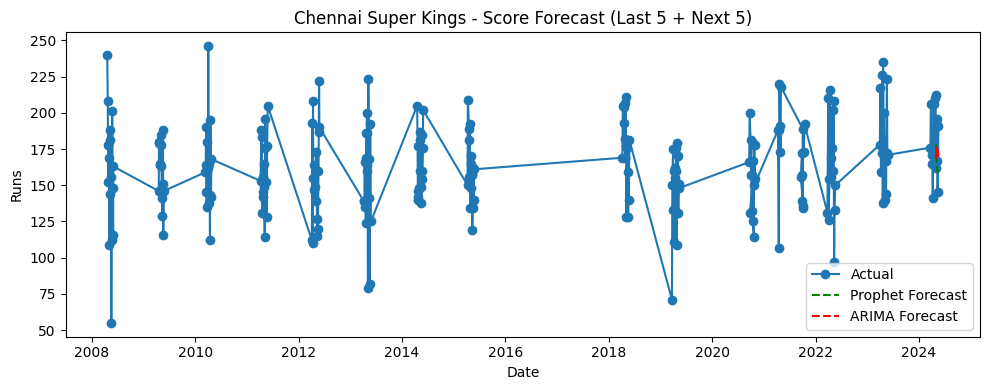

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/a8bu_f1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/oyjhglub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30780', 'data', 'file=/tmp/tmp8uxqj13r/a8bu_f1s.json', 'init=/tmp/tmp8uxqj13r/oyjhglub.json', 'output', 'file=/tmp/tmp8uxqj13r/prophet_modelgdxa09n7/prophet_model-20250430065352.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:53:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🏏 Team: Delhi Capitals


06:53:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


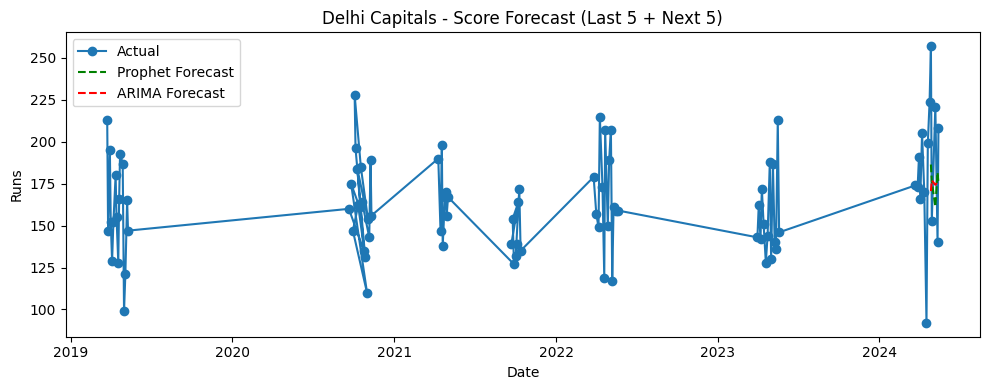

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/1ngyfyz6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/ryi75xfp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42033', 'data', 'file=/tmp/tmp8uxqj13r/1ngyfyz6.json', 'init=/tmp/tmp8uxqj13r/ryi75xfp.json', 'output', 'file=/tmp/tmp8uxqj13r/prophet_model437wlf67/prophet_model-20250430065355.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:53:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🏏 Team: Gujarat Titans


06:53:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


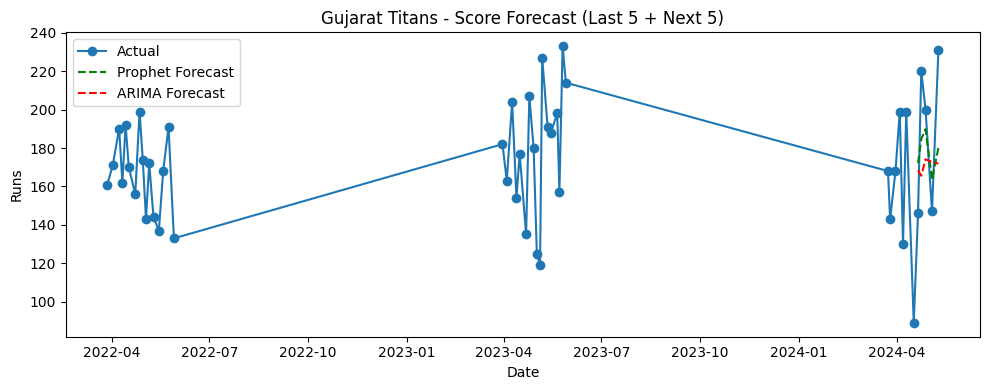

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/7u0qoczi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/0vy8kluq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80630', 'data', 'file=/tmp/tmp8uxqj13r/7u0qoczi.json', 'init=/tmp/tmp8uxqj13r/0vy8kluq.json', 'output', 'file=/tmp/tmp8uxqj13r/prophet_modeltgyl8q84/prophet_model-20250430065355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:53:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:53:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



🏏 Team: Kolkata Knight Riders


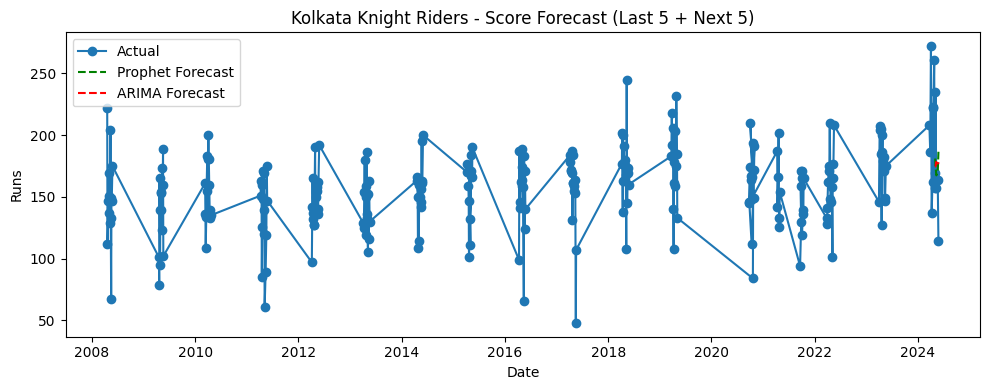

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/0ewsi23q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/d0qk9c70.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6532', 'data', 'file=/tmp/tmp8uxqj13r/0ewsi23q.json', 'init=/tmp/tmp8uxqj13r/d0qk9c70.json', 'output', 'file=/tmp/tmp8uxqj13r/prophet_model03imtpjo/prophet_model-20250430065356.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:53:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🏏 Team: Lucknow Super Giants


06:53:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


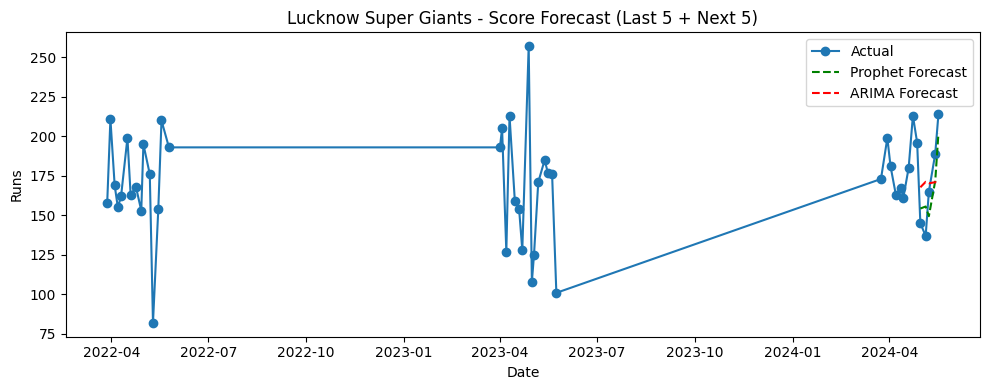

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/p8ky3mbx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/2x0mn0mc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4170', 'data', 'file=/tmp/tmp8uxqj13r/p8ky3mbx.json', 'init=/tmp/tmp8uxqj13r/2x0mn0mc.json', 'output', 'file=/tmp/tmp8uxqj13r/prophet_model_b9tz0pd/prophet_model-20250430065357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:53:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:53:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



🏏 Team: Mumbai Indians


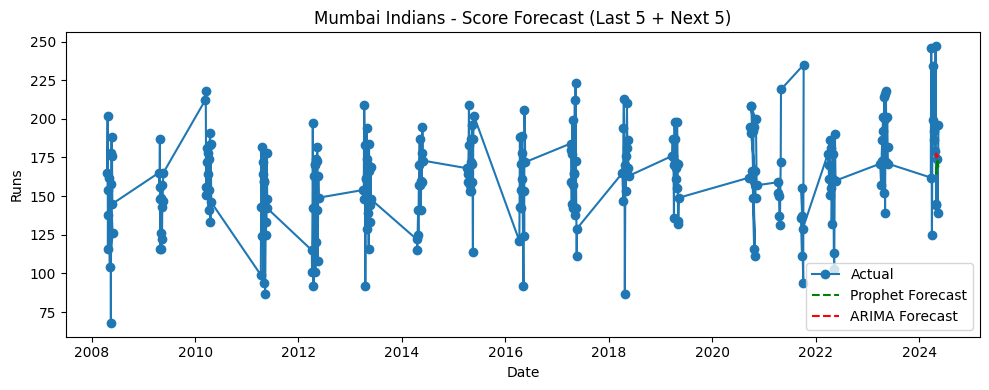

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/owffzvph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/o6844r_r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38640', 'data', 'file=/tmp/tmp8uxqj13r/owffzvph.json', 'init=/tmp/tmp8uxqj13r/o6844r_r.json', 'output', 'file=/tmp/tmp8uxqj13r/prophet_model1cd41dxp/prophet_model-20250430065358.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:53:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🏏 Team: Punjab Kings


06:53:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


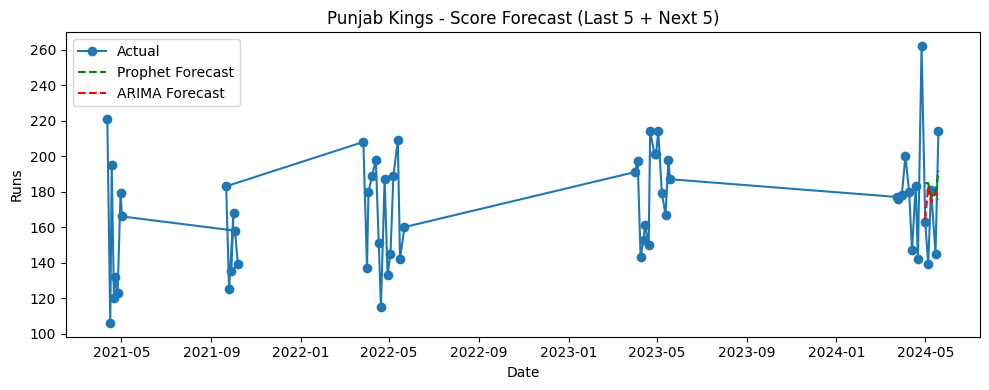

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/3_59neqb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/ix97ogeb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25750', 'data', 'file=/tmp/tmp8uxqj13r/3_59neqb.json', 'init=/tmp/tmp8uxqj13r/ix97ogeb.json', 'output', 'file=/tmp/tmp8uxqj13r/prophet_modelqyv_3xgv/prophet_model-20250430065358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:53:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:53:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



🏏 Team: Rajasthan Royals


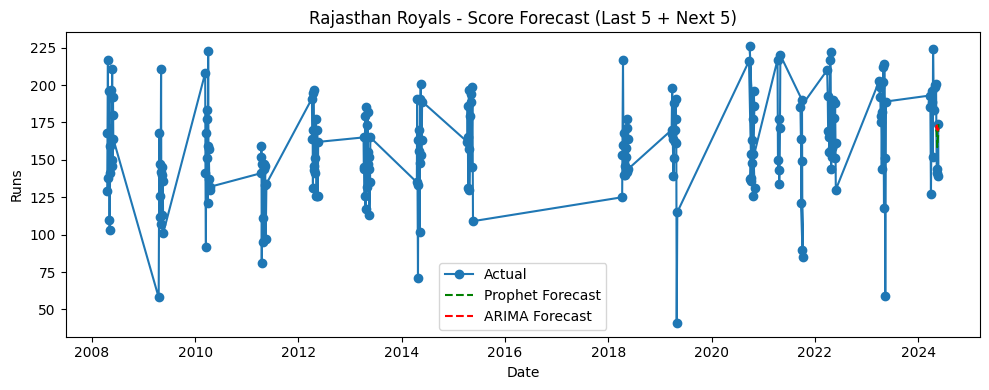

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/gg56eoik.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/wpj_by7d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27668', 'data', 'file=/tmp/tmp8uxqj13r/gg56eoik.json', 'init=/tmp/tmp8uxqj13r/wpj_by7d.json', 'output', 'file=/tmp/tmp8uxqj13r/prophet_modely6s3w14s/prophet_model-20250430065359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:53:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:53:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



🏏 Team: Royal Challengers Bangalore


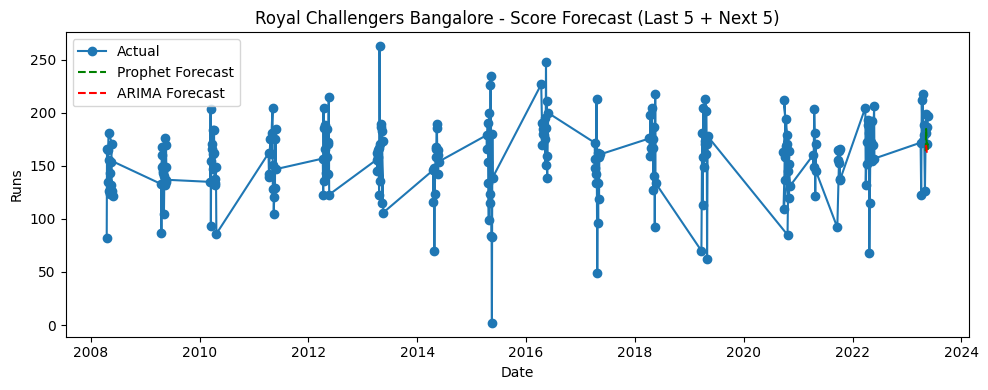

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/alcnf686.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8uxqj13r/6v9_t28f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22485', 'data', 'file=/tmp/tmp8uxqj13r/alcnf686.json', 'init=/tmp/tmp8uxqj13r/6v9_t28f.json', 'output', 'file=/tmp/tmp8uxqj13r/prophet_modelsbqwump4/prophet_model-20250430065400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:54:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:54:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



🏏 Team: Sunrisers Hyderabad


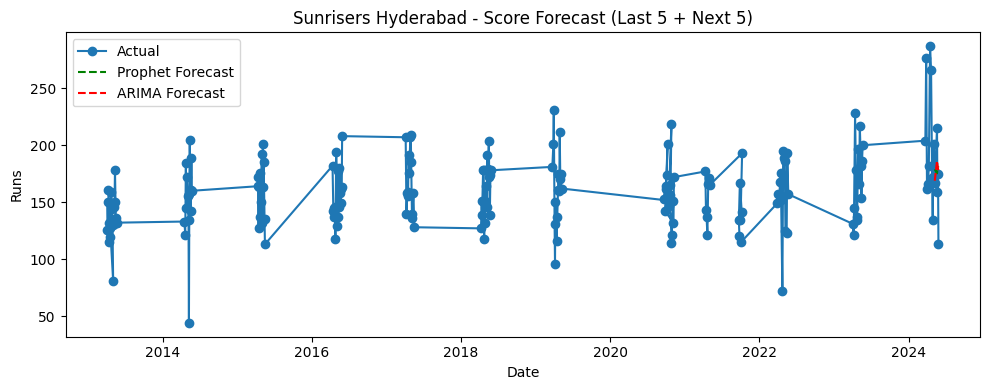


📊 Model Comparison Summary:
                          Team  MAE_Prophet  RMSE_Prophet  MAE_ARIMA  \
4         Lucknow Super Giants    14.541227     14.931462  24.778542   
8  Royal Challengers Bangalore    17.048632     19.619161  21.472904   
0          Chennai Super Kings    19.476486     22.673768  18.736664   
5               Mumbai Indians    22.247205     24.709399  24.659778   
7             Rajasthan Royals    22.993622     25.250430  24.078253   
6                 Punjab Kings    25.359248     28.938895  25.046422   
2               Gujarat Titans    27.789389     31.260089  37.501931   
9          Sunrisers Hyderabad    29.091245     36.966040  24.867670   
3        Kolkata Knight Riders    32.081608     42.744514  32.508470   
1               Delhi Capitals    45.583048     48.769611  45.201703   

   RMSE_ARIMA  
4   28.089362  
8   23.641733  
0   21.009683  
5   27.550383  
7   26.431872  
6   30.493230  
2   40.711927  
9   33.717351  
3   40.900593  
1   50.201114  


In [ ]:
# Install Prophet (if needed)
!pip install prophet --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Load datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

# Define current teams
current_teams = [
    'Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
    'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
    'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangalore',
    'Sunrisers Hyderabad'
]

# Merge deliveries with match date
deliveries = deliveries.merge(matches[['id', 'date']], left_on='match_id', right_on='id')

# Keep only current teams
deliveries = deliveries[deliveries['batting_team'].isin(current_teams)]

# Convert date
deliveries['date'] = pd.to_datetime(deliveries['date'])

# Aggregate total runs per match per team
team_runs = deliveries.groupby(['batting_team', 'match_id', 'date'])['total_runs'].sum().reset_index()

# Container for model comparison
results = []

# Loop over teams
for team in current_teams:
    print(f"\n🏏 Team: {team}")
    df_team = team_runs[team_runs['batting_team'] == team][['date', 'total_runs']]
    df_team = df_team.rename(columns={'date': 'ds', 'total_runs': 'y'})

    if len(df_team) < 20:
        print("Not enough data.")
        continue

    # Prophet
    model_prophet = Prophet()
    model_prophet.fit(df_team)
    future = model_prophet.make_future_dataframe(periods=5)
    forecast = model_prophet.predict(future)
    y_true = df_team['y'][-5:]
    y_pred_prophet = forecast['yhat'][-10:-5].values

    # ARIMA
    model_arima = ARIMA(df_team['y'], order=(2, 1, 2))
    model_arima_fit = model_arima.fit()
    forecast_arima = model_arima_fit.forecast(steps=5)

    # Evaluate
    mae_prophet = mean_absolute_error(y_true, y_pred_prophet)
    mae_arima = mean_absolute_error(y_true, forecast_arima)

    rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred_prophet))
    rmse_arima = np.sqrt(mean_squared_error(y_true, forecast_arima))

    results.append({
        'Team': team,
        'MAE_Prophet': mae_prophet,
        'RMSE_Prophet': rmse_prophet,
        'MAE_ARIMA': mae_arima,
        'RMSE_ARIMA': rmse_arima
    })

    # Plot last few + predictions
    plt.figure(figsize=(10, 4))
    plt.plot(df_team['ds'], df_team['y'], label='Actual', marker='o')
    plt.plot(forecast['ds'][-10:-5], y_pred_prophet, label='Prophet Forecast', linestyle='--', color='green')
    plt.plot(forecast['ds'][-10:-5], forecast_arima, label='ARIMA Forecast', linestyle='--', color='red')
    plt.title(f'{team} - Score Forecast (Last 5 + Next 5)')
    plt.xlabel('Date')
    plt.ylabel('Runs')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Convert result to DataFrame
result_df = pd.DataFrame(results)
print("\n📊 Model Comparison Summary:")
print(result_df.sort_values(by='RMSE_Prophet'))
